# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import nltk 
from nltk.stem import WordNetLemmatizer 
import re
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.svm import LinearSVC


# Load Data

In [2]:
train_df=pd.read_csv("C:\\Users\\GOYAL\\Desktop\\Self Learning\\Analytics Vidhya\\train.csv")
test_df=pd.read_csv("C:\\Users\\GOYAL\\Desktop\\Self Learning\\Analytics Vidhya\\test.csv")

# Merge two data frame

In [3]:
train_df.isnull().sum()

review_id            0
title                0
year               178
user_review          0
user_suggestion      0
dtype: int64

In [4]:
test_df.isnull().sum()

review_id       0
title           0
year           67
user_review     0
dtype: int64

# Exploratory data analysis (EDA)

In [5]:
print(train_df.nunique()) #Check Unique values in each Column

review_id          17494
title                 44
year                   8
user_review        17490
user_suggestion        2
dtype: int64


In [6]:
train_df["user_suggestion"].value_counts() #Check the target class count for imbalancing 

1    9968
0    7526
Name: user_suggestion, dtype: int64

In [7]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
def WORDCLOUD(data, title = None):
    wordcloud = WordCloud(background_color='White',stopwords=stopwords,max_words=200,max_font_size=40,scale=3,random_state=1).generate(str(data))
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

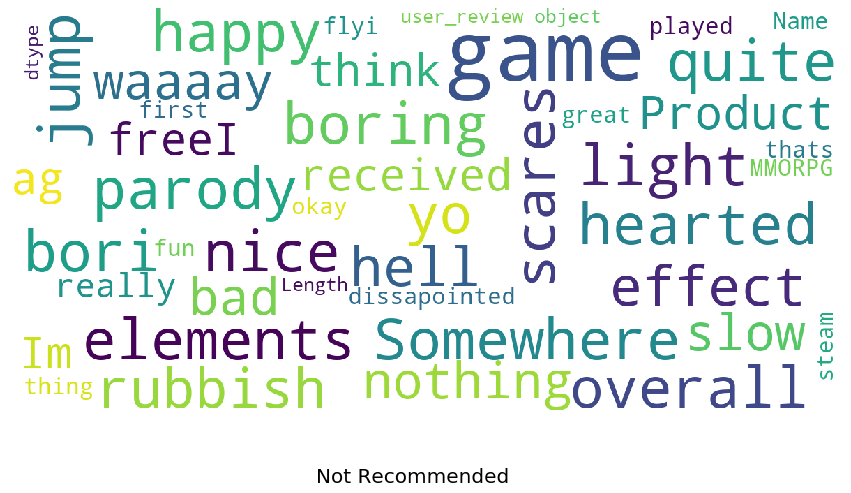

In [8]:
WORDCLOUD(train_df[train_df['user_suggestion'] == 0]['user_review'],'Not Recommended')

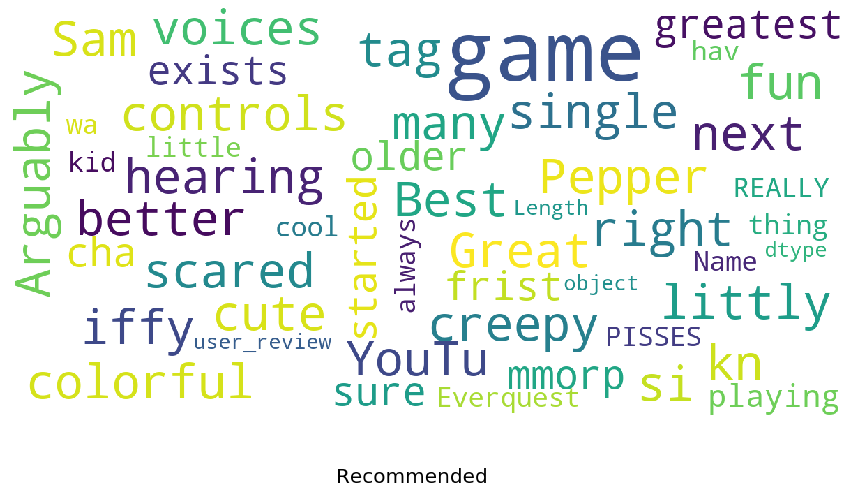

In [9]:
WORDCLOUD(train_df[train_df['user_suggestion'] == 1]['user_review'],'Recommended')

In [10]:
x_train=train_df["user_review"].tolist()
x_test=test_df["user_review"].tolist()

In [11]:
y_train=train_df["user_suggestion"]

# Text Pre Processing

In [12]:
def text_Processed(data):
    tags_removed = BeautifulSoup(data, "lxml").get_text() #Remove tags or markup
    letter_text = re.sub("[^a-zA-Z]"," ",tags_removed) #Remove other text expect letters
    lowercase_text = letter_text.lower().split() #Covert list of words into lowercase
    lemmatizer = WordNetLemmatizer()
    lem_text = [lemmatizer.lemmatize(t) for t in lowercase_text]#lemmatizing
    final = " ".join(lem_text)
    return final

In [13]:
final_x_train_vectorize= [text_Processed(i) for i in x_train]
final_x_test_vectorize= [text_Processed(i) for i in x_test]

# Vectorization of text Data

In [14]:
tokenizer = TweetTokenizer()
vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
full_text = final_x_train_vectorize+ final_x_test_vectorize
vectorizer.fit(full_text)
final_x_train = vectorizer.transform(final_x_train_vectorize)
final_x_test = vectorizer.transform(final_x_test_vectorize)

C:\Users\GOYAL\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


# Checking for best classification model as per data


In [15]:
x_train_check, x_test_check, y_train_check, y_test_check = train_test_split(final_x_train, y_train, random_state=100, test_size=0.2)

In [19]:
l=[LogisticRegression(random_state = 0),LinearSVC(),XGBClassifier()]
for i in l:
    model=i
    model.fit(x_train_check, y_train_check)
    predictions = model.predict(x_test_check)
    print("F1 Score: {}".format(f1_score(y_test_check, predictions)))  

F1 Score: 0.8840242198416396
F1 Score: 0.8999516674722089
F1 Score: 0.8644108471322295


# Prediction Using Best Model


In [20]:
svc=LinearSVC()
svc.fit(final_x_train, y_train)
predictions = svc.predict(final_x_test)
test_df["user_suggestion"]=predictions

In [21]:
result=test_df[["review_id","user_suggestion"]]

In [22]:
result.to_csv("C:\\Users\\GOYAL\\Desktop\\Self Learning\\Analytics Vidhya\\final_result.csv",index=False)